<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/USAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

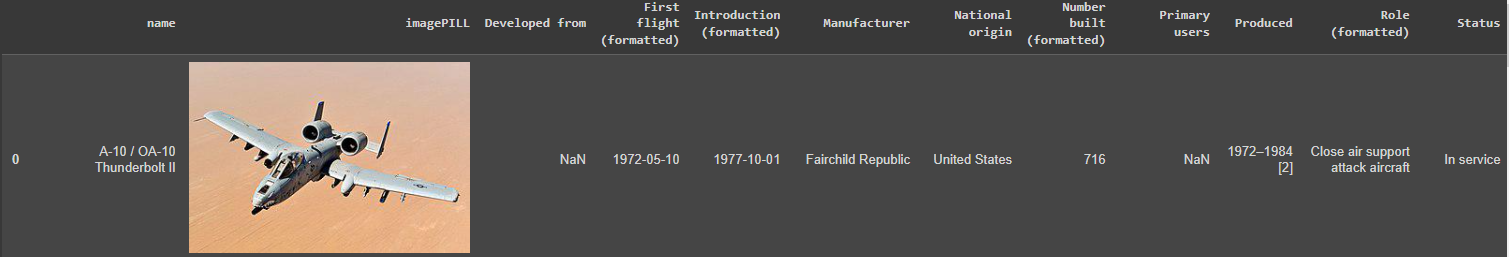

#Libraries

In [425]:
from bs4 import BeautifulSoup as bs
import requests
import re
import pickle
import pandas as pd
from datetime import datetime
import pytest

#Scraping the infobox

##Loading the webpage content

In [426]:
r = requests.get('https://en.wikipedia.org/wiki/Fairchild_Republic_A-10_Thunderbolt_II')
soup = bs(r.content)
contents = soup.prettify()

In [427]:
print(contents[:98])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
 


##Infobox

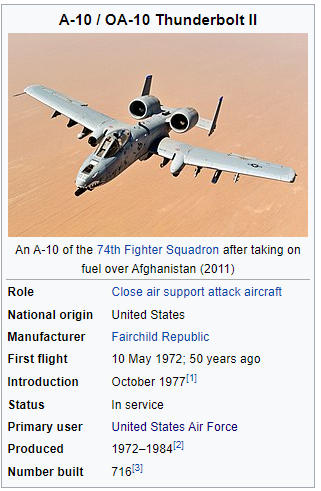

In [428]:
infobox = soup.find(class_ = 'infobox')
print(infobox.prettify()[:100])

<table class="infobox" style="width:25.5em;border-spacing:2px;">
 <tbody>
  <tr>
   <th colspan="2" 


In [429]:
infobox_rows = infobox.find_all('tr')
for row in infobox_rows:
  print(row.prettify()[5:20])

 <th colspan="2
 <td colspan="2
 <td colspan="2
 <th>
  Role
 <
 <th>
  <span c
 <th>
  Manufac
 <th>
  First f
 <th>
  Introdu
 <th>
  Status

 <th>
  Primary
 <th>
  Produce
 <th>
  <span c


##Saving rows to the dictionary

In [430]:
# #OBSOLETE

# def get_content(row_data):
#   if row_data.find('li'):
#     return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
#   else:
#     return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

In [431]:
def get_content(row_data):
  return row_data.get_text(' ', strip = True)

In [432]:
aircraft_info = {}

for idx, row in enumerate(infobox_rows):
  if idx == 0:
    aircraft_info['name'] = row.find('th').get_text(' ', strip = True)
  elif idx == 1:
    #Image
    # aircraft_info['img_link'] = row.find('a', href = True)['href']
    image = row.find('a', href = True)
    image_link = image.find('img')['src']
    aircraft_info['img_link'] = 'https:' + image_link
  elif idx == 2:
    #Decription of the image
    continue
  else:
    content_key = row.find('th').get_text(' ', strip = True)
    content_val = get_content(row.find('td'))
    aircraft_info[content_key] = content_val

In [433]:
aircraft_info

{'name': 'A-10 / OA-10 Thunderbolt II',
 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg',
 'Role': 'Close air support attack aircraft Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Fairchild Republic',
 'First flight': '10\xa0May 1972 ; 50 years ago ( 1972-05-10 )',
 'Introduction': 'October 1977 [1]',
 'Status': 'In service',
 'Primary\xa0user': 'United States Air Force',
 'Produced': '1972–1984 [2]',
 'Number built': '716 [3]'}

##Scraping infobox function

In [434]:
def get_content(row_data):
  #If data is in the list
  if row_data.find('li'):
    return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
  else:
    return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

def get_info(url):
  r = requests.get(url)
  soup = bs(r.content)

  infobox = soup.find(class_ = 'infobox')
  infobox_rows = infobox.find_all('tr')

  aircraft_info = {}

  for idx, row in enumerate(infobox_rows):
    if idx == 0:
      aircraft_info['name'] = row.find('th').get_text(' ', strip = True)
    elif idx == 1:
      #Image
      # aircraft_info['img_link'] = row.find('a', href = True)['href']
      image = row.find('a', href = True)
      image_link = image.find('img')['src']
      aircraft_info['img_link'] = 'https:' + image_link
    elif idx == 2:
      #Decription of the image
      continue
    else:
      content_key = row.find('th').get_text(' ', strip = True).replace('\xa0', ' ')
      content_val = get_content(row.find('td'))
      aircraft_info[content_key] = content_val

  return aircraft_info

In [435]:
get_info('https://en.wikipedia.org/wiki/Lockheed_AC-130')

{'name': 'AC-130 Spectre/Spooky/Stinger II/Ghostrider',
 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/AC-130H_Spectre_banking_turn.jpg/300px-AC-130H_Spectre_banking_turn.jpg',
 'Role': 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Lockheed Lockheed Martin',
 'First flight': 'AC-130A: 1966',
 'Introduction': ['AC-130A: 1968',
  'AC-130H: 1969 [1]',
  'AC-130U: 1995 [2]',
  'AC-130W: 2012 [3]',
  'AC-130J: 2017 [4]'],
 'Retired': ['AC-130A: 1995',
  'AC-130H: 2015 [1]',
  'AC-130U: 2020 [5]',
  'AC-130W: 2022 [6]'],
 'Status': 'In service',
 'Primary user': 'United States Air Force',
 'Developed from': 'Lockheed C-130 Hercules'}

#Scraping all infoboxes

##Loading the webpage with links

In [436]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_active_United_States_Air_Force_aircraft')
soup = bs(r.content)
contents = soup.prettify()

* A - Attack
* B - Bomber
* C - Transport
* E - Special Electronic
* F - Fighter
* H - Search and rescue
* K - Tanker
* M - Multi-mission
* O - Observation
* R - Reconnaissance
* T - Trainer
* TG - Trainer glider
* U - Utility
* V - VIP staff transport
* W - Weather reconnaissance
* Undesignated foreign aircraft

##Scraping the table

In [437]:
aircrafts_links = {}

table = soup.find('table')
table_rows = table.find_all('tr')

for table_row in table_rows:
  table_data = table_row.find('td')
  if table_data:
    link = table_data.find('a')
    try:
      print(link['title'])
      aircrafts_links[link['title']] = link['href']
    except:
      pass

Fairchild Republic A-10 Thunderbolt II
Lockheed AC-130
Air Tractor-L3Harris AT-802U Sky Warden
Rockwell B-1 Lancer
Northrop Grumman B-2 Spirit
Northrop Grumman B-21 Raider
Boeing B-52 Stratofortress
McDonnell Douglas F-15 Eagle
McDonnell Douglas F-15E Strike Eagle
McDonnell Douglas F-15E Strike Eagle
General Dynamics F-16 Fighting Falcon
Lockheed Martin F-22 Raptor
Lockheed Martin F-35 Lightning II
Boeing E-3 Sentry
Boeing E-4
Bombardier Global Express
Gulfstream G550
Lockheed EC-130
Lockheed EC-130H Compass Call
Northrop Grumman E-8 Joint STARS
Bombardier Dash 8
Beechcraft C-12 Huron
Fairchild C-26 Metroliner
Boeing RC-135
Lockheed U-2
Pilatus PC-12
CASA/IPTN CN-235
McDonnell Douglas KC-10 Extender
Boeing KC-46 Pegasus
Lockheed Martin KC-130
Boeing KC-135 Stratotanker
Lockheed C-5 Galaxy
Beechcraft C-12 Huron
Beechcraft 1900
Boeing C-17 Globemaster III
Gulfstream IV
Learjet 35
Boeing C-32
Boeing C-32
Boeing C-40 Clipper
Lockheed C-130 Hercules
C-130J
PZL M28 Skytruck
Dornier 328
Lockh

In [438]:
aircrafts_links

{'Fairchild Republic A-10 Thunderbolt II': '/wiki/Fairchild_Republic_A-10_Thunderbolt_II',
 'Lockheed AC-130': '/wiki/Lockheed_AC-130',
 'Air Tractor-L3Harris AT-802U Sky Warden': '/wiki/Air_Tractor-L3Harris_AT-802U_Sky_Warden',
 'Rockwell B-1 Lancer': '/wiki/Rockwell_B-1_Lancer',
 'Northrop Grumman B-2 Spirit': '/wiki/Northrop_Grumman_B-2_Spirit',
 'Northrop Grumman B-21 Raider': '/wiki/Northrop_Grumman_B-21_Raider',
 'Boeing B-52 Stratofortress': '/wiki/Boeing_B-52_Stratofortress',
 'McDonnell Douglas F-15 Eagle': '/wiki/McDonnell_Douglas_F-15_Eagle',
 'McDonnell Douglas F-15E Strike Eagle': '/wiki/McDonnell_Douglas_F-15E_Strike_Eagle#Variants',
 'General Dynamics F-16 Fighting Falcon': '/wiki/General_Dynamics_F-16_Fighting_Falcon',
 'Lockheed Martin F-22 Raptor': '/wiki/Lockheed_Martin_F-22_Raptor',
 'Lockheed Martin F-35 Lightning II': '/wiki/Lockheed_Martin_F-35_Lightning_II',
 'Boeing E-3 Sentry': '/wiki/Boeing_E-3_Sentry',
 'Boeing E-4': '/wiki/Boeing_E-4',
 'Bombardier Global E

##Get info with the url from the dictionary

In [439]:
for key, value in aircrafts_links.items():
  base = 'https://en.wikipedia.org/'
  rel_link = base + value
  try:
    print(get_info(rel_link))
  except:
    pass
  break

{'name': 'A-10 / OA-10 Thunderbolt II', 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg', 'Role': 'Close air support attack aircraft Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Fairchild Republic', 'First flight': '10 May 1972 ; 50 years ago ( 1972-05-10 )', 'Introduction': 'October 1977 [1]', 'Status': 'In service', 'Primary user': 'United States Air Force', 'Produced': '1972–1984 [2]', 'Number built': '716 [3]'}


In [440]:
aircrafts_info_list = []
for aircraft, link in aircrafts_links.items():
  base = 'https://en.wikipedia.org/'
  rel_link = base + link
  try:
    print(get_info(rel_link))
    aircrafts_info_list.append(get_info(rel_link))
  except:
    print('Error')

{'name': 'A-10 / OA-10 Thunderbolt II', 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg', 'Role': 'Close air support attack aircraft Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Fairchild Republic', 'First flight': '10 May 1972 ; 50 years ago ( 1972-05-10 )', 'Introduction': 'October 1977 [1]', 'Status': 'In service', 'Primary user': 'United States Air Force', 'Produced': '1972–1984 [2]', 'Number built': '716 [3]'}
{'name': 'AC-130 Spectre/Spooky/Stinger II/Ghostrider', 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/AC-130H_Spectre_banking_turn.jpg/300px-AC-130H_Spectre_banking_turn.jpg', 'Role': 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Lockheed Lockheed Martin', 'First flight': 'AC-130A: 1966', 'I

##Pickling the results

In [441]:
def to_pickle(file, filename):
  base_url = '/content/drive/MyDrive/Projekty/US Air Force/'
  with open (base_url+filename, 'wb') as handle:
    pickle.dump(file, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [442]:
to_pickle(aircrafts_info_list, 'aircrafts_info_list.pickle')

In [443]:
with open('/content/drive/MyDrive/Projekty/US Air Force/aircrafts_info_list.pickle', 'rb') as handle:
  aircrafts_info_list = pickle.load(handle)

In [444]:
aircrafts_info_list[5]

{'name': 'B-21 Raider',
 'img_link': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/B-21_Plant_42_hangar.jpg/300px-B-21_Plant_42_hangar.jpg',
 'Role': 'Stealth strategic bomber Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Northrop Grumman',
 'Status': 'In development',
 'Primary user': 'United States Air Force'}

In [445]:
len(aircrafts_info_list)

64

##Rough check of the results with get method

In [446]:
roles = [aircraft.get('Role', 'NaN') for aircraft in aircrafts_info_list]
print(roles)

['Close air support attack aircraft Type of aircraft', 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft', 'Light attack /ISR aircraft Type of aircraft', 'Supersonic strategic heavy bomber Type of aircraft', 'Stealth strategic heavy bomber Type of aircraft', 'Stealth strategic bomber Type of aircraft', 'Strategic bomber Type of aircraft', 'Air superiority fighter Type of aircraft', 'Multirole strike fighter Type of aircraft', 'Multirole fighter , air superiority fighter Type of aircraft', 'Air superiority fighter Type of aircraft', 'Multirole fighter Type of aircraft', 'Airborne early warning and control (AEW&C) Type of aircraft', 'Airborne strategic command and control post Type of aircraft', 'NaN', 'Business jet Type of aircraft', 'Airborne Communications Jamming (EC-130H) Psychological and Information Operations (EC-130J) Type of aircraft', 'Electronic warfare (EW), Suppression of Enemy Air Defenses (SEAD), offensive counter-information Type of air

In [447]:
count_roles_nan = roles.count('NaN')
count_roles_nan

4

In [448]:
images = [aircraft.get('img_link', 'NaN') for aircraft in aircrafts_info_list]
count_img_nan = images.count('NaN')
count_img_nan

0

###Regular expression to change the quantities

In [449]:
numbers_built = [aircraft.get('Number built', 'NaN') for aircraft in aircrafts_info_list]
numbers_built

['716 [3]',
 'NaN',
 'NaN',
 '104 [a]',
 '21 [1] [2]',
 'NaN',
 '744 [1]',
 'F-15A/B/C/D/J/DJ: 1,198 [1]',
 '525 [N 1]',
 '4,604 (June 2018) [2] [3]',
 '195 (8 test and 187 operational aircraft) [1]',
 '875+ as of December 2022 [update] [4]',
 '68',
 '4',
 '816 (Oct 2018) [2]',
 '>600 [1]',
 '14 EC-130H 7 EC-130J',
 '14 (USAF)',
 '17 [1]',
 '1,258 (as of March 31, 2019) [2]',
 'NaN',
 'NaN',
 '32 total airframes in all iterations',
 '104',
 '1,700 (as of October 2019 [update] ) [1]',
 '354 ( CASA 285 [2] + IPTN 69 [3] )',
 'KC-10: 60; KDC-10: 2',
 '56 as of November 2021 [3]',
 'KC-130B: 6 KC-130F: 46 KC-130H: 33 KC-130R: 14 KC-130T: 28 KC-130J: 53',
 '803',
 '131 (C-5A: 81, C-5B: 50)',
 '695',
 '279 [1]',
 '900+ [1]',
 '738',
 'C-32A: 4; [1] C-32B: 2 [2]',
 '28 [ citation needed ]',
 'Over 2,500 as of 2015 [2]',
 '500 as of March 2022 [1]',
 '200+ (including PZL An-28)',
 '217',
 'HC-130P/N: Active force, 13; ANG, 13; Reserve, 10 HC-130H: 22; two with the Avionics One Upgrade (A1U) HC

In [450]:
p1 = r'\[\d+\]|\(\D*\d*\,*\d{4}\D*\)'
# pattern2 = r'\[\D\]|(\D+\d*\D*)|(\d{4})'
p3 = r'(\[\D*\])|(\((\d|\D)*)\)'
p4 = r'(\D*-\d*\D)|(\[\D*\d\])'
p5 = r'\d{4}(?!\+)'
p6 = r'\D'
for item in range(len(numbers_built)):
  numbers_built[item] = re.sub(p1, '', numbers_built[item])
  numbers_built[item] = re.sub(p3, '', numbers_built[item])
  numbers_built[item] = re.sub(p4, '', numbers_built[item])
  numbers_built[item] = re.sub(p5, '', numbers_built[item])
  numbers_built[item] = re.sub(p6, '', numbers_built[item])
  print(numbers_built[item])
# print(numbers_built)

716


104
21

744
1198
525
4604
195
875
68
4
816
600
147
14
17
1258


32
104
1700
354
602
56
64633142853
803
131
695
279
900
738
42
28
2500
500
200
217
131310226
2600
985
2
112
1100

400
60
64
180
850
2
1189
1459
16000

12000
316
42
19000
1000
2030


In [451]:
def conv_numbers(number):
  if isinstance(number, list):
    number = str(number[0])

  if isinstance(number, str):
    if number == '':
      return None
    #Split on ; and take the first element
    if ':' in number:
      number = number.split(':')[1]
    if ';' in number:
      number = number.split(';')[0]
    #Split on [
    if ' [' in number:
      number = number.split(' [')[0]

    if ' (' in number:
      number = number.split(' (')[0]

    pat1 = r'\d{1,4}'
    pat2 = r'\d{1,2},\d{3}'
    pat3 = r'\D'

    if re.search(pat2, number):
      number = str(re.search(pat2, number).group(0))
      # print('pat2')

    elif re.search(pat1, number):
      number = str(re.search(pat1, number).group(0))
      # print('pat1')
    
    elif re.search(pat3, number):
      number = re.sub(pat3, '', number)
      # print('pat3')
  
  if number == 'NaN':
    return None

  return number
  # print(number)

In [452]:
print(conv_numbers('HC-130P/N: Active force, 13; ANG, 13; Reserve, 10 HC-130H: 22; two with the Avionics One Upgrade (A1U) HC-130J: 6'))
print(conv_numbers('400 as of 2020 [2]'))
print(conv_numbers('KC-10: 60; KDC-10: 2'))
print(conv_numbers('Over 2,500 as of 2015'))
print(conv_numbers('1,189'))

13
400
60
2,500
1,189


In [453]:
for number in numbers_built:
  print(number, 'converted to: ', conv_numbers(number))

716 converted to:  716
 converted to:  None
 converted to:  None
104 converted to:  104
21 converted to:  21
 converted to:  None
744 converted to:  744
1198 converted to:  1198
525 converted to:  525
4604 converted to:  4604
195 converted to:  195
875 converted to:  875
68 converted to:  68
4 converted to:  4
816 converted to:  816
600 converted to:  600
147 converted to:  147
14 converted to:  14
17 converted to:  17
1258 converted to:  1258
 converted to:  None
 converted to:  None
32 converted to:  32
104 converted to:  104
1700 converted to:  1700
354 converted to:  354
602 converted to:  602
56 converted to:  56
64633142853 converted to:  6463
803 converted to:  803
131 converted to:  131
695 converted to:  695
279 converted to:  279
900 converted to:  900
738 converted to:  738
42 converted to:  42
28 converted to:  28
2500 converted to:  2500
500 converted to:  500
200 converted to:  200
217 converted to:  217
131310226 converted to:  1313
2600 converted to:  2600
985 converted

#Loading the webpage with aircraft types description

In [454]:
r = requests.get('https://en.wikipedia.org/wiki/United_States_Air_Force')
soup = bs(r.content)
contents = soup.prettify()

##Finding the chapter with aircraft types description

In [455]:
h2_tags = soup.find_all('h2')
for h2_tag in h2_tags:
  if h2_tag.find('span', id = 'Aircraft_inventory'):
    aircraft_inventory = h2_tag.find('span', id = 'Aircraft_inventory')
    aircraft_inventory_tag = aircraft_inventory.parent
    print(aircraft_inventory.text)

Aircraft inventory


In [456]:
aircraft_inventory

<span class="mw-headline" id="Aircraft_inventory">Aircraft inventory</span>

##Finding siblings (h3 and p tags)

In [457]:
aircrafts_description = {}

next_h3_siblings = aircraft_inventory_tag.find_next_siblings('h3', limit = 16)

for h3_sibling in next_h3_siblings:
  aircraft_type = h3_sibling.text.replace('[edit]', '')
  h3_sibling_tag = h3_sibling.parent
  next_p_siblings = h3_sibling.find_all_next(('p','h3'), limit = 5)
  
  description = []

  for item in next_p_siblings:
    if item.name == 'p':
      description.append(item.text)
    else:
      break
    aircrafts_description[aircraft_type] = ' '.join(description)

##Results in a dictionary

In [458]:
aircrafts_description

{'A – Attack': "The attack aircraft[85] of the USAF are designed to attack targets on the ground and are often deployed as close air support for, and in proximity to, U.S. ground forces. The proximity to friendly forces require precision strikes from these aircraft that are not always possible with bomber aircraft. Their role is tactical rather than strategic, operating at the front of the battle rather than against targets deeper in the enemy's rear. The Air Force is currently running the OA-X experiment, with the intent to procure an off-the-shelf light attack aircraft. Current USAF attack aircraft are operated by Air Combat Command, Pacific Air Forces, and Air Force Special Operations Command.\n",
 'B – Bomber': "US Air Force bombers are strategic weapons, primarily used for long range strike missions with either conventional or nuclear ordnance. Traditionally used for attacking strategic targets, today many bombers are also used in the tactical mission, such as providing close air 

In [459]:
for key, val in aircrafts_description.items():
    print(key)
    print(val[:100])
    break

A – Attack
The attack aircraft[85] of the USAF are designed to attack targets on the ground and are often deplo


#DataFrame

##Date to datatime object conversion

In [460]:
def conv_date(date):
  #To take the first element of the list
  if isinstance(date, list):
    date = str(date[0])

  if isinstance(date, str):
    #Split on ; and take the first element
    if ' ;' in date:
      date = date.split(' ;')[0]
    #Split on [
    if ' [' in date:
      date = date.split(' [')[0]
    #Date in brackets i.e. 'KC-130F (2006) KC-130R (2007) KC-130T (2021)'
    pat4 = r'\D{1,2}-\d{2,3}\D\s\('
    if re.match(pat4, date):
      date = re.sub(pat4, '', date).split(')')[0]
    #Split on (
    elif ' (' in date:
      date = date.split(' (')[0]

    #Splitted date to be checked with re patterns
    pat1 = r'\d{1,2}\s\D{3,8}\s\d{4}' #d{1,2} M{3,9} yyyy
    pat2 = r'\D{1,3}-\d{1,3}\D*:\s' #model: yyyy
    pat3 = r'\d{4}\s(\d*|\D*)'
    pat5 = r'\d{4}'

    if re.match(pat1, date):
      date = " ".join(date.split(" ", 3)[:3])
      # print('pat1')
    
    elif re.match(pat2, date):
      date = date.split(': ')[1]
      # date = re.sub(pat2, '', date)
      # print('pat2')

      if re.match(pat5, date):
        date = str(re.match(pat5, date).group(0))
      
      if re.match(pat1, date):
        date = str(re.match(pat1, date).group(0))
    
    elif re.match(pat3, date):
      date = date[:4]
      # print('pat3')

    #Date is in regular form
    else:
      date

  #Date is NaN
  else:
    # date = 'NaN'
    date = None

  formats = ['%Y', '%B %d, %Y', '%d %B %Y', '%B %Y']
  for format in formats:
    try:
      return datetime.strptime(date, format).date()
    except:
      pass
  return None

###Tests of the function with pytest

In [461]:
print(conv_date('EC-137D: 9 February 1972 E-3: 25 May 1976 [1]'))
print(conv_date('1977 (Mi-8MT), 1981 (Mi-17)'))
print(conv_date(['AC-130A: 1995', 'AC-130H: 2015 [1]', 'AC-130U: 2020 [5]', 'AC-130W: 2022 [6]']))

1972-02-09
1977-01-01
1995-01-01


In [462]:
def tests():
  assert str(conv_date('EC-137D: 9 February 1972 E-3: 25 May 1976 [1]')) == '1972-02-09'
  assert str(conv_date('1977 (Mi-8MT), 1981 (Mi-17)')) == '1977-01-01'
  assert str(conv_date(['AC-130A: 1995', 'AC-130H: 2015 [1]', 'AC-130U: 2020 [5]', 'AC-130W: 2022 [6]'])) == '1995-01-01'
  assert str(conv_date('3 February 1989 [1] (first)')) == '1989-02-03'
  assert str(conv_date('AC-130A: 1966')) == '1966-01-01'
  assert conv_date('There is no date') == None

In [463]:
tests()

##Creating of the dataframe

In [464]:
df = pd.DataFrame(aircrafts_info_list)
df.head()

,name,img_link,Role,National origin,Manufacturer,First flight,Introduction,Status,Primary user,Produced,Number built,Retired,Developed from,Primary users,Variants,Developed into,Designer,Design group,Built by
0,A-10 / OA-10 Thunderbolt II,https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg,Close air support attack aircraft Type of aircraft,United States,Fairchild Republic,10 May 1972 ; 50 years ago ( 1972-05-10 ),October 1977 [1],In service,United States Air Force,1972–1984 [2],716 [3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC-130 Spectre/Spooky/Stinger II/Ghostrider,https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/AC-130H_Spectre_banking_turn.jpg/300px-AC-130H_Spectre_banking_turn.jpg,Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft,United States,Lockheed Lockheed Martin,AC-130A: 1966,"[AC-130A: 1968, AC-130H: 1969 [1], AC-130U: 1995 [2], AC-130W: 2012 [3], AC-130J: 2017 [4]]",In service,United States Air Force,NaN,NaN,"[AC-130A: 1995, AC-130H: 2015 [1], AC-130U: 2020 [5], AC-130W: 2022 [6]]",Lockheed C-130 Hercules,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-802U Sky Warden,https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/AirTractor_Paris_I.jpg/300px-AirTractor_Paris_I.jpg,Light attack /ISR aircraft Type of aircraft,United States,Air Tractor / L3Harris Technologies,NaN,NaN,NaN,United States Special Operations Command,NaN,NaN,NaN,Air Tractor AT-802,NaN,NaN,NaN,NaN,NaN,NaN
3,B-1 Lancer,https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/B-1B_air_refueling.jpg/300px-B-1B_air_refueling.jpg,Supersonic strategic heavy bomber Type of aircraft,United States,North American Rockwell/Rockwell International,23 December 1974 ; 48 years ago ( 1974-12-23 ),1 October 1986,In service,United States Air Force,"1973–1974, 1983–1988",104 [a],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B-2 Spirit,https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/B-2_Spirit_%28cropped%29.jpg/300px-B-2_Spirit_%28cropped%29.jpg,Stealth strategic heavy bomber Type of aircraft,United States,Northrop Corporation Northrop Grumman,17 July 1989 ; 33 years ago ( 1989-07-17 ),1 January 1997,In service,United States Air Force,1987–2000,21 [1] [2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
first_flights = [aircraft.get('First flight', 'NaN') for aircraft in aircrafts_info_list]
first_flights[:5]

['10 May 1972 ; 50 years ago ( 1972-05-10 )',
 'AC-130A: 1966',
 'NaN',
 '23 December 1974 ; 48 years ago ( 1974-12-23 )',
 '17 July 1989 ; 33 years ago ( 1989-07-17 )']

In [466]:
for date in first_flights:
  print(date, 'converted to: ', conv_date(date))

10 May 1972 ; 50 years ago ( 1972-05-10 ) converted to:  1972-05-10
AC-130A: 1966 converted to:  1966-01-01
NaN converted to:  None
23 December 1974 ; 48 years ago ( 1974-12-23 ) converted to:  1974-12-23
17 July 1989 ; 33 years ago ( 1989-07-17 ) converted to:  1989-07-17
NaN converted to:  None
15 April 1952 ; 70 years ago ( 1952-04-15 ) converted to:  1952-04-15
27 July 1972 ; 50 years ago ( 1972-07-27 ) converted to:  1972-07-27
11 December 1986 ; 36 years ago ( 1986-12-11 ) converted to:  1986-12-11
['20 January 1974 ; 48 years ago ( 1974-01-20 ) (unplanned)', '2 February 1974 ; 48 years ago ( 1974-02-02 ) (official)'] converted to:  1974-01-20
7 September 1997 ; 25 years ago ( 1997-09-07 ) converted to:  1997-09-07
15 December 2006 ; 16 years ago ( 2006-12-15 ) (F-35A) converted to:  2006-12-15
EC-137D: 9 February 1972 E-3: 25 May 1976 [1] converted to:  1972-02-09
13 June 1973 converted to:  1973-06-13
13 October 1996 converted to:  1996-10-13
NaN converted to:  None
NaN convert

##Introduction date to datetime conversion

In [467]:
introduction_dates = [aircraft.get('Introduction', 'NaN') for aircraft in aircrafts_info_list]
introduction_dates[:5]

['October 1977 [1]',
 ['AC-130A: 1968',
  'AC-130H: 1969 [1]',
  'AC-130U: 1995 [2]',
  'AC-130W: 2012 [3]',
  'AC-130J: 2017 [4]'],
 'NaN',
 '1 October 1986',
 '1 January 1997']

In [468]:
for date in introduction_dates:
  print(date, 'converted to: ', conv_date(date))

October 1977 [1] converted to:  1977-10-01
['AC-130A: 1968', 'AC-130H: 1969 [1]', 'AC-130U: 1995 [2]', 'AC-130W: 2012 [3]', 'AC-130J: 2017 [4]'] converted to:  1968-01-01
NaN converted to:  None
1 October 1986 converted to:  1986-10-01
1 January 1997 converted to:  1997-01-01
NaN converted to:  None
February 1955 converted to:  1955-02-01
9 January 1976 ; 46 years ago ( 1976-01-09 ) converted to:  1976-01-09
1988 [1] [2] 30 September 1989 ( IOC ) [3] converted to:  1988-01-01
17 August 1978 ; 44 years ago ( 1978-08-17 ) converted to:  1978-08-17
15 December 2005 converted to:  2005-12-15
['F-35B: 31 July 2015 (USMC) [1]', 'F-35A: 2 August 2016 (USAF) [2]', 'F-35C: 28 February 2019 (USN) [3]'] converted to:  2015-07-31
March 1977 converted to:  1977-03-01
1974 [1] converted to:  1974-01-01
July 1999 [1] converted to:  1999-07-01
2004 converted to:  2004-01-01
1975 converted to:  1975-01-01
April 1982 converted to:  1982-04-01
1991 converted to:  1991-01-01
1984 with NorOntair converted 

##Retired date to datetime conversion

In [469]:
retired_dates = [aircraft.get('Retired', 'NaN') for aircraft in aircrafts_info_list]
retired_dates[:5]

['NaN',
 ['AC-130A: 1995',
  'AC-130H: 2015 [1]',
  'AC-130U: 2020 [5]',
  'AC-130W: 2022 [6]'],
 'NaN',
 'NaN',
 'NaN']

In [470]:
for date in retired_dates:
  print(date, 'converted to: ', conv_date(date))

NaN converted to:  None
['AC-130A: 1995', 'AC-130H: 2015 [1]', 'AC-130U: 2020 [5]', 'AC-130W: 2022 [6]'] converted to:  1995-01-01
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
KC-130F (2006) KC-130R (2007) KC-130T (2021) converted to:  2006-01-01
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN co

##Removal of "Type of aircraft" in Role

In [471]:
def clean_role(role):
  to_remove = ' Type of aircraft'
  return role.replace(to_remove,'')

In [472]:
print(clean_role('Strategic bomber Type of aircraft'))

Strategic bomber


##Applying conv_date and conv_numbers functions to the DF

In [473]:
df.columns

Index(['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
       'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
       'Number built', 'Retired', 'Developed from', 'Primary users',
       'Variants', 'Developed into', 'Designer', 'Design group', 'Built by'],
      dtype='object')

In [474]:
for aircraft in aircrafts_info_list:
  aircraft['First flight (formatted)'] = conv_date(aircraft.get('First flight', 'NaN'))
  aircraft['Introduction (formatted)'] = conv_date(aircraft.get('Introduction', 'NaN'))
  aircraft['Retired (formatted)'] = conv_date(aircraft.get('Retired', 'NaN'))
  aircraft['Role (formatted)'] = clean_role(aircraft.get('Role', 'NaN'))
  aircraft['Number built (formatted)'] = conv_numbers(aircraft.get('Number built', 'NaN'))

df = pd.DataFrame(aircrafts_info_list)

In [475]:
df.columns

Index(['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
       'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
       'Number built', 'First flight (formatted)', 'Introduction (formatted)',
       'Retired (formatted)', 'Role (formatted)', 'Number built (formatted)',
       'Retired', 'Developed from', 'Primary users', 'Variants',
       'Developed into', 'Designer', 'Design group', 'Built by'],
      dtype='object')

In [476]:
df = df.drop(['First flight', 'Introduction', 'Retired', 'Role', 'Number built'], axis = 1)

In [477]:
df.columns

Index(['name', 'img_link', 'National origin', 'Manufacturer', 'Status',
       'Primary user', 'Produced', 'First flight (formatted)',
       'Introduction (formatted)', 'Retired (formatted)', 'Role (formatted)',
       'Number built (formatted)', 'Developed from', 'Primary users',
       'Variants', 'Developed into', 'Designer', 'Design group', 'Built by'],
      dtype='object')

##Removing brackets [] (Manufacturer, Primary user(s))

In [478]:
def rem_brackets(raw_row):
  if isinstance(raw_row, list):
    row = (', '.join(raw_row))

  elif isinstance(raw_row, str):
    row = raw_row

  pattern = r'\[\d{1,2}\]' #[1]
  if re.search(pattern, row):
    row = re.sub(pattern, '', row)
    #Remove extra spaces (after deleting [x])
    row = re.sub(' +', ' ', row)
    #If the last character is the space, then take the string without it
    if row[-1] == ' ':
      row = row[:-1]
  row = row.replace('[', '').replace(']', '')

  if ' ,' in row:
    row = row.replace(' ,', ',')
  
  # print(row)
  return row

In [479]:
print(rem_brackets('[Japan Air Self-Defense Force [23], Royal Saudi Air Force, Israeli Air Force]'))
print(rem_brackets('United States Air Force Royal Air Force [12] [2]'))
print(rem_brackets('Fairchild Republic	'))

Japan Air Self-Defense Force, Royal Saudi Air Force, Israeli Air Force
United States Air Force Royal Air Force
Fairchild Republic	


In [480]:
for aircraft in aircrafts_info_list:
  aircraft['Manufacturer (formatted)'] = rem_brackets(aircraft.get('Manufacturer', 'NaN'))
  aircraft['National origin (formatted)'] = rem_brackets(aircraft.get('National origin', 'NaN'))
  aircraft['Primary users (formatted)'] = rem_brackets(aircraft.get('Primary users', 'NaN'))
  aircraft['Role (formatted)'] = rem_brackets(aircraft.get('Role (formatted)', 'NaN'))
  aircraft['Status (formatted)'] = rem_brackets(aircraft.get('Status', 'NaN'))
  aircraft['Produced (formatted)'] = rem_brackets(aircraft.get('Produced', 'NaN'))

df = pd.DataFrame(aircrafts_info_list)

#Data analysis

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         64 non-null     object
 1   img_link                     64 non-null     object
 2   Role                         60 non-null     object
 3   National origin              46 non-null     object
 4   Manufacturer                 63 non-null     object
 5   First flight                 51 non-null     object
 6   Introduction                 55 non-null     object
 7   Status                       58 non-null     object
 8   Primary user                 18 non-null     object
 9   Produced                     47 non-null     object
 10  Number built                 57 non-null     object
 11  First flight (formatted)     51 non-null     object
 12  Introduction (formatted)     55 non-null     object
 13  Retired (formatted)          3 non-nu

In [482]:
df['Role (formatted)'].unique()

array(['Close air support attack aircraft',
       'Ground-attack aircraft and close air support gunship for SOF teams',
       'Light attack /ISR aircraft', 'Supersonic strategic heavy bomber',
       'Stealth strategic heavy bomber', 'Stealth strategic bomber',
       'Strategic bomber', 'Air superiority fighter',
       'Multirole strike fighter',
       'Multirole fighter, air superiority fighter', 'Multirole fighter',
       'Airborne early warning and control (AEW&C)',
       'Airborne strategic command and control post', 'NaN',
       'Business jet',
       'Airborne Communications Jamming (EC-130H) Psychological and Information Operations (EC-130J)',
       'Electronic warfare (EW), Suppression of Enemy Air Defenses (SEAD), offensive counter-information',
       'Airborne battle management', 'Turboprop regional airliner',
       'Military utility aircraft', 'Military transport aircraft',
       'Reconnaissance aircraft', 'High-altitude reconnaissance aircraft',
       'Passenge

##Display images

In [483]:
# https://stackoverflow.com/questions/46107348/how-to-display-image-stored-in-pandas-dataframe

##Downloading pictures

In [484]:
import os
from pathlib import Path
from PIL import Image
import urllib.request

def get_img(url, raw_filename):
  path = r'/content/drive/MyDrive/Projekty/US Air Force/images/'
  os.chdir(path)
  raw_filename = raw_filename.replace('/','')
  filename = r"{}".format(raw_filename).replace(' ','')
  filepath = path + filename + '.jpg'
  img = urllib.request.urlretrieve(url, filepath)
  return filepath

In [485]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg'

get_img(url, '1')

'/content/drive/MyDrive/Projekty/US Air Force/images/1.jpg'

In [486]:
for aircraft in aircrafts_info_list:
  aircraft['img_local'] = get_img(aircraft.get('img_link', 'NaN'), aircraft.get('name', 'NaN'))

In [487]:
df = pd.DataFrame(aircrafts_info_list)

In [488]:
df.head()

,name,img_link,Role,National origin,Manufacturer,First flight,Introduction,Status,Primary user,Produced,...,Produced (formatted),img_local,Retired,Developed from,Primary users,Variants,Developed into,Designer,Design group,Built by
0,A-10 / OA-10 Thunderbolt II,https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/300px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg,Close air support attack aircraft Type of aircraft,United States,Fairchild Republic,10 May 1972 ; 50 years ago ( 1972-05-10 ),October 1977 [1],In service,United States Air Force,1972–1984 [2],...,1972–1984,/content/drive/MyDrive/Projekty/US Air Force/images/A-10OA-10ThunderboltII.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC-130 Spectre/Spooky/Stinger II/Ghostrider,https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/AC-130H_Spectre_banking_turn.jpg/300px-AC-130H_Spectre_banking_turn.jpg,Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft,United States,Lockheed Lockheed Martin,AC-130A: 1966,"[AC-130A: 1968, AC-130H: 1969 [1], AC-130U: 1995 [2], AC-130W: 2012 [3], AC-130J: 2017 [4]]",In service,United States Air Force,NaN,...,NaN,/content/drive/MyDrive/Projekty/US Air Force/images/AC-130SpectreSpookyStingerIIGhostrider.jpg,"[AC-130A: 1995, AC-130H: 2015 [1], AC-130U: 2020 [5], AC-130W: 2022 [6]]",Lockheed C-130 Hercules,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-802U Sky Warden,https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/AirTractor_Paris_I.jpg/300px-AirTractor_Paris_I.jpg,Light attack /ISR aircraft Type of aircraft,United States,Air Tractor / L3Harris Technologies,NaN,NaN,NaN,United States Special Operations Command,NaN,...,NaN,/content/drive/MyDrive/Projekty/US Air Force/images/AT-802USkyWarden.jpg,NaN,Air Tractor AT-802,NaN,NaN,NaN,NaN,NaN,NaN
3,B-1 Lancer,https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/B-1B_air_refueling.jpg/300px-B-1B_air_refueling.jpg,Supersonic strategic heavy bomber Type of aircraft,United States,North American Rockwell/Rockwell International,23 December 1974 ; 48 years ago ( 1974-12-23 ),1 October 1986,In service,United States Air Force,"1973–1974, 1983–1988",...,"1973–1974, 1983–1988",/content/drive/MyDrive/Projekty/US Air Force/images/B-1Lancer.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B-2 Spirit,https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/B-2_Spirit_%28cropped%29.jpg/300px-B-2_Spirit_%28cropped%29.jpg,Stealth strategic heavy bomber Type of aircraft,United States,Northrop Corporation Northrop Grumman,17 July 1989 ; 33 years ago ( 1989-07-17 ),1 January 1997,In service,United States Air Force,1987–2000,...,1987–2000,/content/drive/MyDrive/Projekty/US Air Force/images/B-2Spirit.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Displaying pictures

In [489]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import io

pd.set_option('display.max_colwidth', None)

def get_thumbnail(path):
    i = Image.open(path)    
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [490]:
df['imagePILL'] = df['img_local'].map(lambda f: get_thumbnail(f))

##Final df

In [491]:
df.columns

Index(['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
       'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
       'Number built', 'First flight (formatted)', 'Introduction (formatted)',
       'Retired (formatted)', 'Role (formatted)', 'Number built (formatted)',
       'Manufacturer (formatted)', 'National origin (formatted)',
       'Primary users (formatted)', 'Status (formatted)',
       'Produced (formatted)', 'img_local', 'Retired', 'Developed from',
       'Primary users', 'Variants', 'Developed into', 'Designer',
       'Design group', 'Built by', 'imagePILL'],
      dtype='object')

In [499]:
# new_cols = ['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
      #  'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
      #  'Number built', 'First flight (formatted)', 'Introduction (formatted)',
      #  'Retired (formatted)', 'Role (formatted)', 'Number built (formatted)',
      #  'img_local', 'Manufacturer (formatted)', 'National origin (formatted)',
      #  'Primary users (formatted)', 'Retired', 'Developed from',
      #  'Primary users', 'Variants', 'Developed into', 'Designer',
      #  'Design group', 'Built by'],

new_cols = ['name', 'imagePILL',
       'Status (formatted)', 'Produced (formatted)',
       'First flight (formatted)', 'Introduction (formatted)',
       'Role (formatted)', 'Number built (formatted)',
       'Manufacturer (formatted)', 'National origin (formatted)',
       'Primary users (formatted)']

In [500]:
df_copy = df.copy()
df_copy = df_copy.reindex(new_cols, axis=1)

,name,imagePILL,Status (formatted),Produced (formatted),First flight (formatted),Introduction (formatted),Role (formatted),Number built (formatted),Manufacturer (formatted),National origin (formatted),Primary users (formatted)
0,A-10 / OA-10 Thunderbolt II,,In service,1972–1984,1972-05-10,1977-10-01,Close air support attack aircraft,716,Fairchild Republic,United States,NaN
1,AC-130 Spectre/Spooky/Stinger II/Ghostrider,,In service,NaN,1966-01-01,1968-01-01,Ground-attack aircraft and close air support gunship for SOF teams,,Lockheed Lockheed Martin,United States,NaN
2,AT-802U Sky Warden,,NaN,NaN,None,None,Light attack /ISR aircraft,,Air Tractor / L3Harris Technologies,United States,NaN
3,B-1 Lancer,,In service,"1973–1974, 1983–1988",1974-12-23,1986-10-01,Supersonic strategic heavy bomber,104,North American Rockwell/Rockwell International,United States,NaN
4,B-2 Spirit,,In service,1987–2000,1989-07-17,1997-01-01,Stealth strategic heavy bomber,21,Northrop Corporation Northrop Grumman,United States,NaN
5,B-21 Raider,,In development,NaN,None,None,Stealth strategic bomber,,Northrop Grumman,United States,NaN
6,B-52 Stratofortress,,In service,1952–1962,1952-04-15,1955-02-01,Strategic bomber,744,Boeing,United States,United States Air Force NASA
7,F-15 Eagle,,In service,1972–present,1972-07-27,1976-01-09,Air superiority fighter,"1,198","McDonnell Douglas, Boeing Defense, Space & Security",United States,"Japan Air Self-Defense Force, Royal Saudi Air Force, Israeli Air Force"
8,F-15E Strike Eagle,,In service,1985–present,1986-12-11,1988-01-01,Multirole strike fighter,525,"McDonnell Douglas (1985–1997) Boeing Defense, Space & Security (1997–present)",United States,"United States Air Force Royal Saudi Air Force Israeli Air Force Republic of Korea Air Force For other users, see Operators"
9,F-16 Fighting Falcon,,In service,"1973–2017, 2019–present",1974-01-20,1978-08-17,"Multirole fighter, air superiority fighter","4,604","General Dynamics (1974–1993), Lockheed Corporation (1993–1995), Lockheed Martin (1995–present)",United States,United States Air Force 25 other users (see operators page )

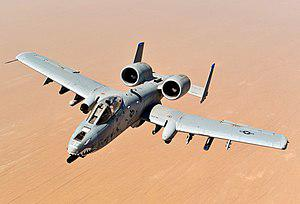
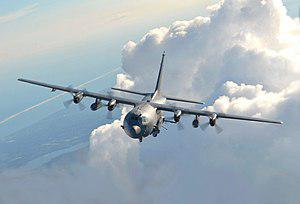
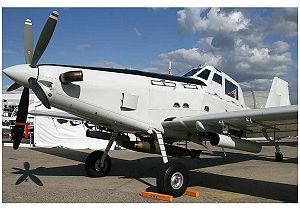
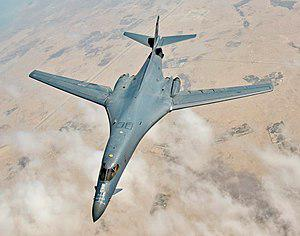
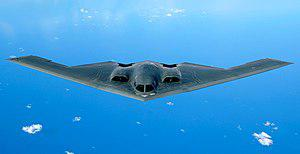
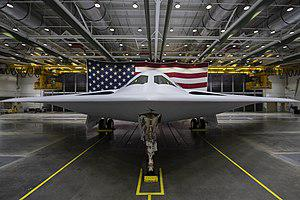
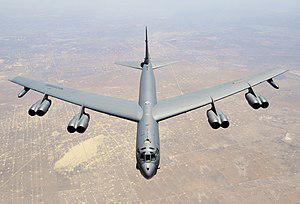
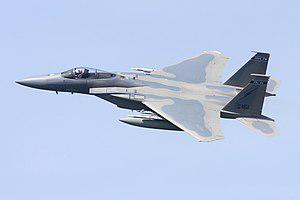
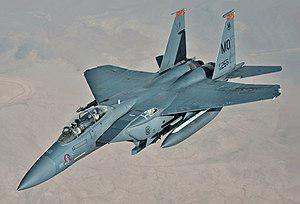
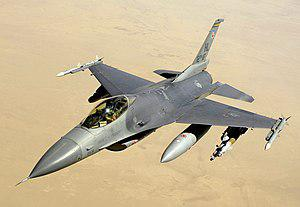
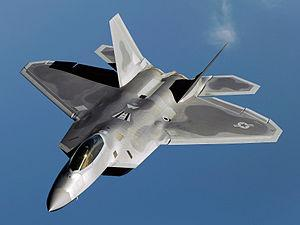
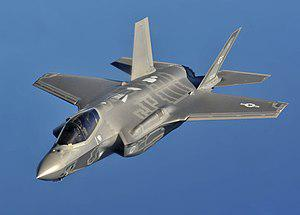
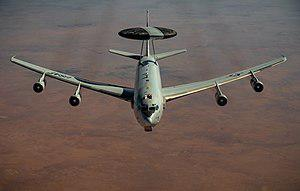
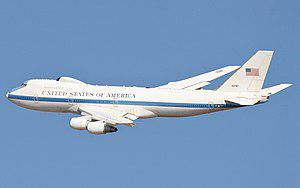
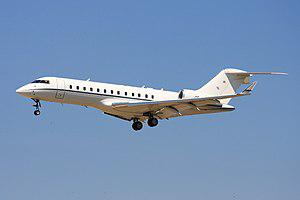
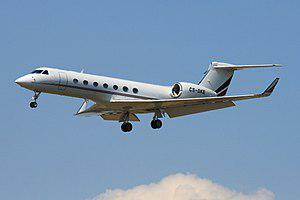
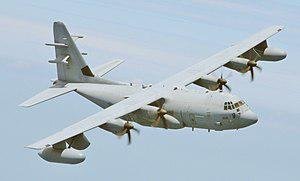
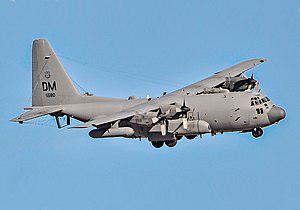
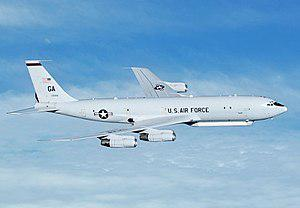
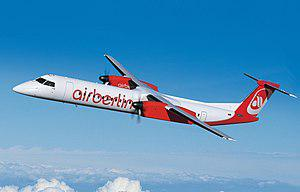
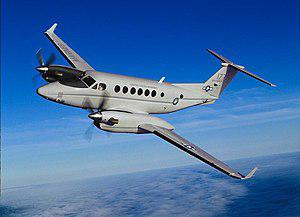
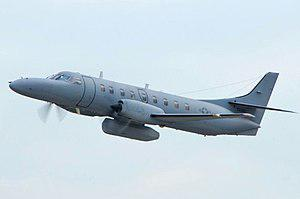
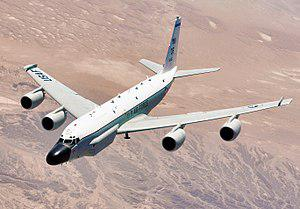
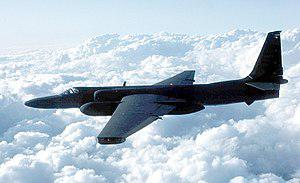
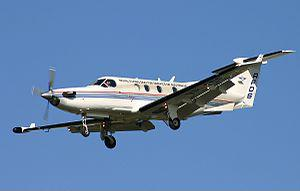
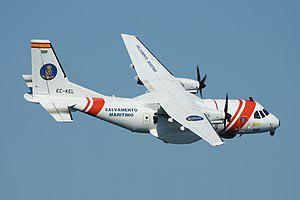
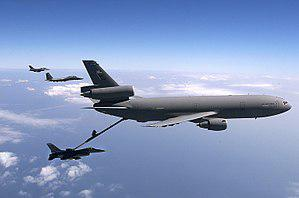
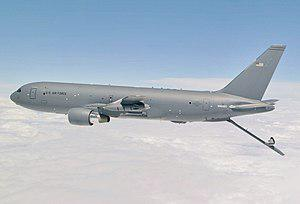
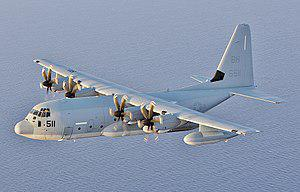
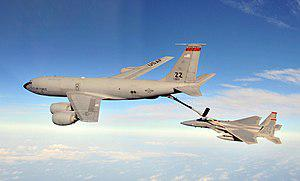
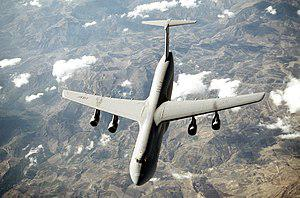
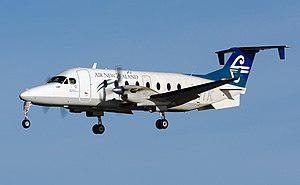
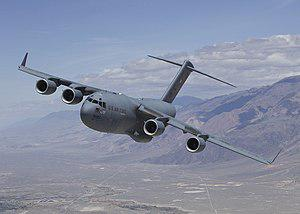
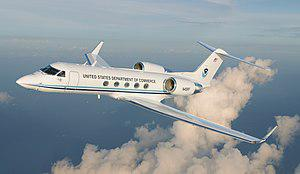
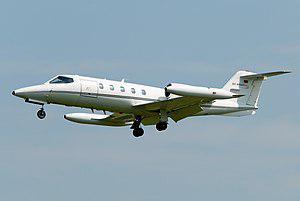
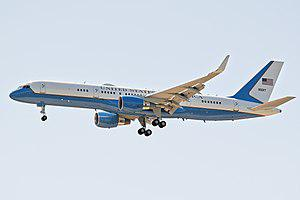
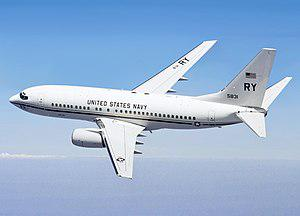
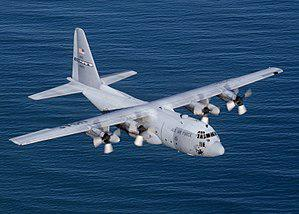
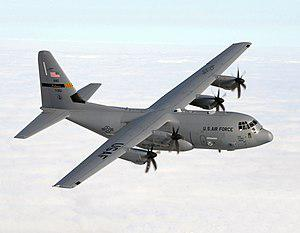
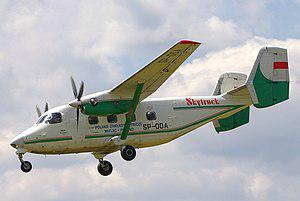
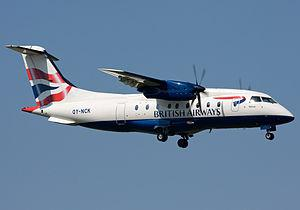
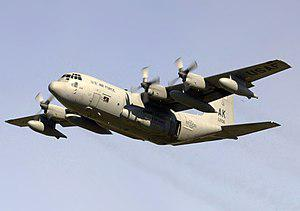
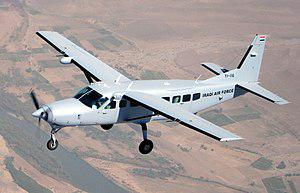
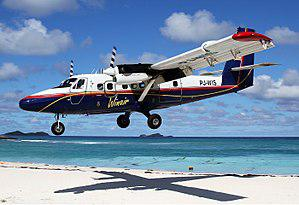
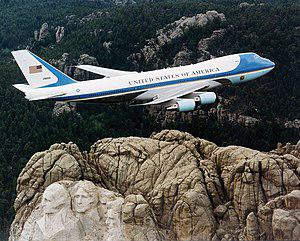
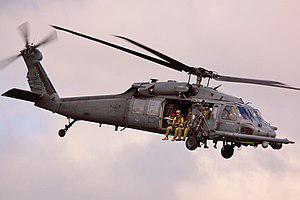
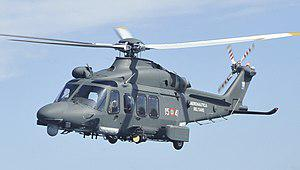
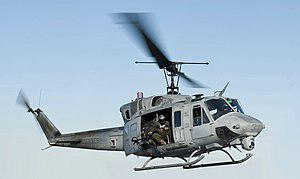
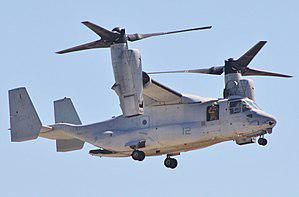
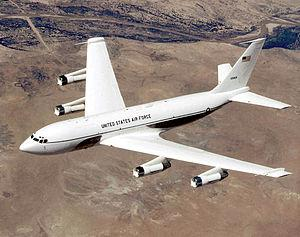
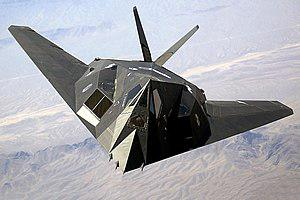
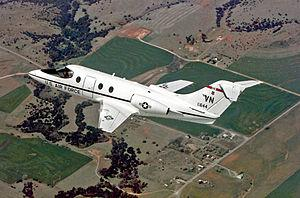
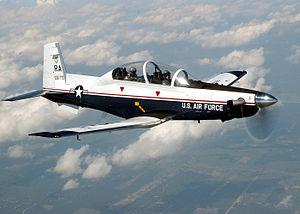
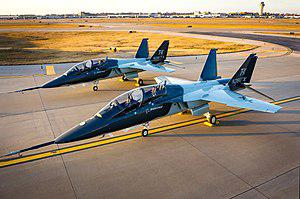
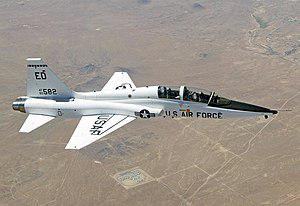
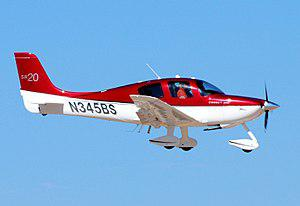
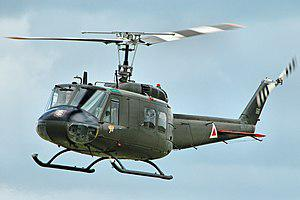
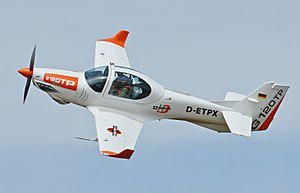
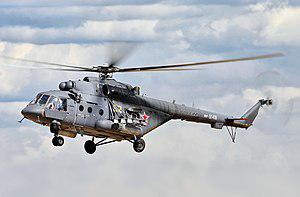
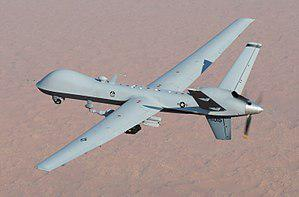
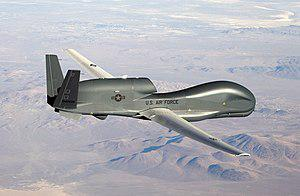
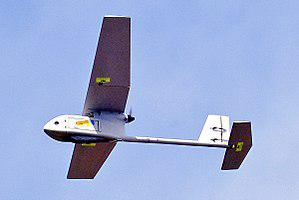
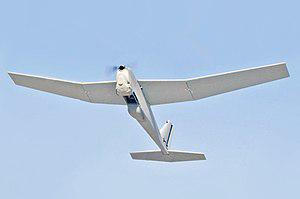
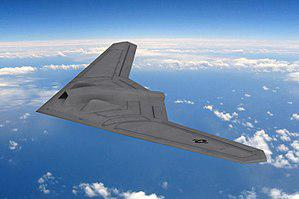

In [502]:
HTMLdf = HTML(df_copy.to_html(formatters={'imagePILL': image_formatter}, escape=False))
HTMLdf

##Analysis

In [503]:
df_copy.describe()

,name,imagePILL,Status (formatted),Produced (formatted),First flight (formatted),Introduction (formatted),Role (formatted),Number built (formatted),Manufacturer (formatted),National origin (formatted),Primary users (formatted)
count,64,64,64,64,51,55,64,64,64,64,64
unique,64,64,11,47,51,52,52,53,49,10,42
top,A-10 / OA-10 Thunderbolt II,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x204 at 0x7F35F96F1520>,In service,NaN,1972-05-10,1959-01-01,NaN,,Boeing,United States,NaN
freq,1,1,32,17,1,2,4,7,7,36,22


#Pickling results

In [504]:
to_pickle(HTMLdf, 'HTMLdf.pickle')